# Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Link to dataset https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

# Context
The growth of Supermarkets in most populated cities are increasing and market competitons are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches located in 3 different cities in Myanmar for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

# Data Dictionary
Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Purpose
This dataset can be used for predictive data analytics purpose.

# Task 1 : Initial Data Exploration

In [85]:
df = pd.read_excel("archive/supermarket_sales.xlsx") #the input dataset is in a folder called archive in my local environment
#df.head(10) 
df.tail(10)

Invoice ID Branch       City Customer type  Gender  \
990  886-18-2897      A     Yangon        Normal  Female   
991  602-16-6955      B   Mandalay        Normal  Female   
992  745-74-0715      A     Yangon        Normal    Male   
993  690-01-6631      B   Mandalay        Normal    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
990      Food and beverages       56.56         5  14.1400   296.9400   
991       Sports and travel       76.60        10  38.3000   804.3000   
992  Electronic accessories       58.03         2   5.8030   121.8630   
993     Fashion accessories       17.49        10   8.7450   183.6450   
994  Electronic accessories       60.95         1   3.0475    63.9975   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date      Time      Payment    cogs  gross margin percentage  \
990 2019-03-22  19:06:00  Credit card  282.80                 4.761905   
991 2019-01-24  18:10:00      Ewallet  766.00                 4.761905   
992 2019-03-10  20:46:00      Ewallet  116.06                 4.761905   
993 2019-02-22  18:35:00      Ewallet  174.90                 4.761905   
994 2019-02-18  11:40:00      Ewallet   60.95                 4.761905   
995 2019-01-29  13:46:00      Ewallet   40.35                 4.761905   
996 2019-03-02  17:16:00      Ewallet  973.80                 4.761905   
997 2019-02-09  13:22:00         Cash   31.84                 4.761905   
998 2019-02-22  15:33:00         Cash   65.82                 4.761905   
999 2019-02-18  13:28:00         Cash  618.38                 4.761905   

     gross income  Rating  
990       14.1400     4.5  
991       38.3000     6.0  
992        5.8030     8.8  
993        8.7450     6.6  
994        3.0475     5.9  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6

In [86]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [87]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [88]:
df['Date'] = pd.to_datetime(df['Date'])

In [89]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [90]:
df.set_index('Date', inplace = True)

In [91]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   

                Time      Payment    cogs  gross margin percentage  \
Date                                                                 
2019-01-05  13:08:00      Ewallet  522.83                 4.761905   
2019-03-08  10:29:00         Cash   76.40                 4.761905   
2019-03-03  13:23:00  Credit card  324.31                 4.761905   
2019-01-27  20:33:00      Ewallet  465.76                 4.761905   
2019-02-08  10:37:00      Ewallet  604.17                 4.761905   

            gross income  Rating  
Date                              
2019-01-05       26.1415     9.1  
2019-03-08        3.8200     9.6  
2019-03-03       16.2155     7.4  
2019-01-27       23.2880     8.4  
2019-02-08       30.2085     5.3

In [92]:
df.describe() #summary statistics of numerical values

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

# Task 2: Univariate Analysis

Question 1: What does the distribution of customer rating look like? Is it skewed?

<Figure size 1440x1440 with 0 Axes>

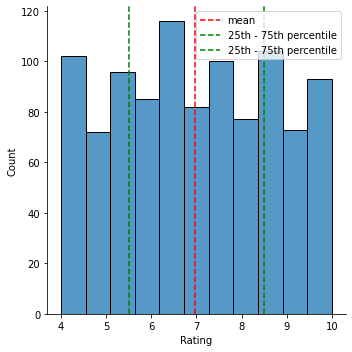

In [93]:
plt.figure(figsize=(20, 20))
sns.displot(x = df['Rating'])
plt.axvline(x = np.mean(df['Rating']), color = 'red', ls = '--',label ='mean')
plt.axvline(x = np.percentile(df['Rating'], 25), c = 'green', ls = '--', label = '25th - 75th percentile')
plt.axvline(x = np.percentile(df['Rating'], 75), c = 'green', ls = '--', label = '25th - 75th percentile')
plt.legend()

Answer 1: Not skewed, uniformly balanced.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

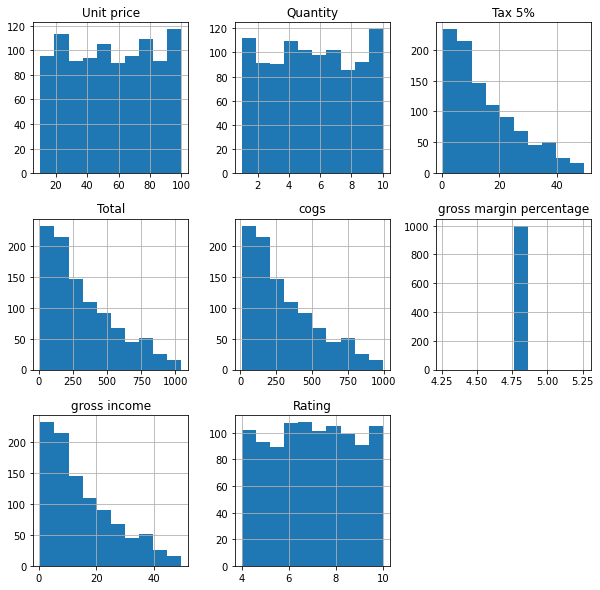

In [94]:
df.hist(figsize = (10,10))

Question 2: Do aggregate sales numbers differ by much between Branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

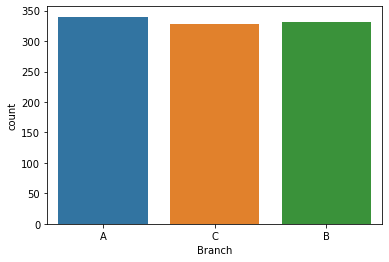

In [95]:
sns.countplot(x=df['Branch'])

Answer 2: No, they are not much different by branches.

In [96]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

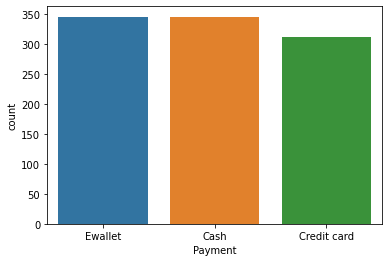

In [97]:
# Checking out difference in payment methods
sns.countplot(x = df['Payment'])

In [98]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

# Task 3: Bivariate Analysis
Question 3: Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

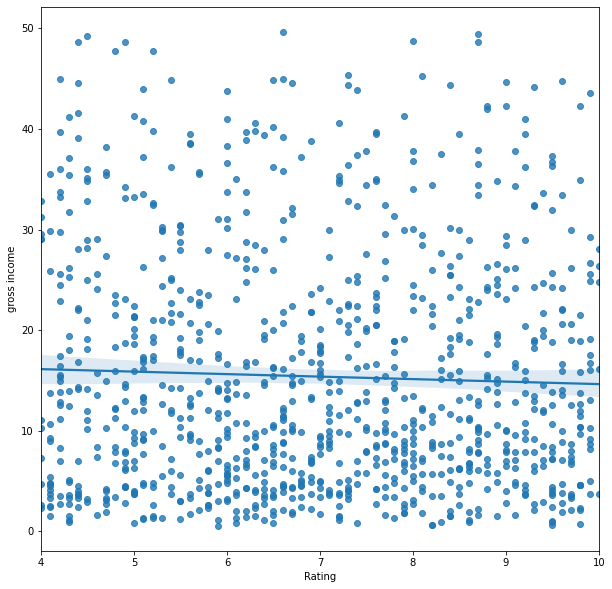

In [99]:
plt.figure(figsize = (10,10))
sns.regplot(x =df['Rating'],y =df['gross income']) 

Answer 3: Trendline is pretty flat, so no significant relationship

Question 3.5: What is the relationship between branches and gross income?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

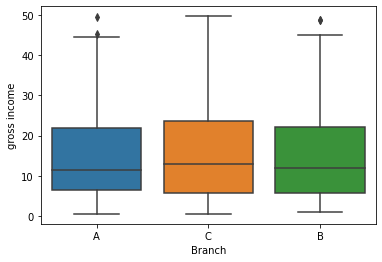

In [100]:
sns.boxplot(x = df['Branch'], y = df['gross income']) 

Answer 3.5: No significant difference, median line is slightly higher in branch c 

Question 3.6: What is the relationship between Gender and gross income?

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

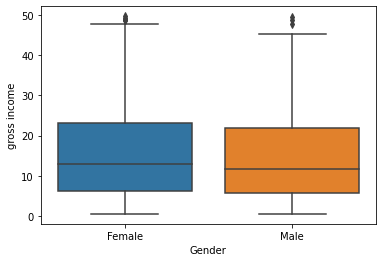

In [101]:
sns.boxplot(x = df['Gender'], y = df['gross income']) 

Answer 3.6: Women spend slightly higher at 75th percentile than man

Question 4: Is there a noticeable time trend in gross income?

In [102]:
df.head() #there can be multiple customers at any given date , so we need to aggregate the dates

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   

                Time      Payment    cogs  gross margin percentage  \
Date                                                                 
2019-01-05  13:08:00      Ewallet  522.83                 4.761905   
2019-03-08  10:29:00         Cash   76.40                 4.761905   
2019-03-03  13:23:00  Credit card  324.31                 4.761905   
2019-01-27  20:33:00      Ewallet  465.76                 4.761905   
2019-02-08  10:37:00      Ewallet  604.17                 4.761905   

            gross income  Rating  
Date                              
2019-01-05       26.1415     9.1  
2019-03-08        3.8200     9.6  
2019-03-03       16.2155     7.4  
2019-01-27       23.2880     8.4  
2019-02-08       30.2085     5.3

In [103]:
df.groupby(df.index).mean() # we aggregate the dates, as there can be multiple entries in the single day

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.750000  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  6.090909  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

In [104]:
df.groupby(df.index).mean().index # We get the index which is the Date column

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='gross income'>

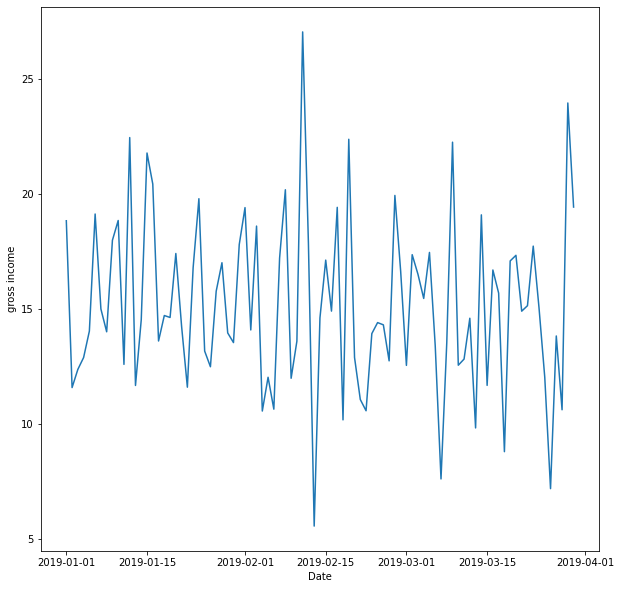

In [105]:
plt.figure(figsize=(10, 10))
sns.lineplot(x = df.groupby(df.index).mean().index,
            y = df.groupby(df.index).mean()['gross income'])

Answer 4: No significance because its only 3 months data, yet we see highs on valentinesday(feb 14) than other days.

<Figure size 1440x1440 with 0 Axes>

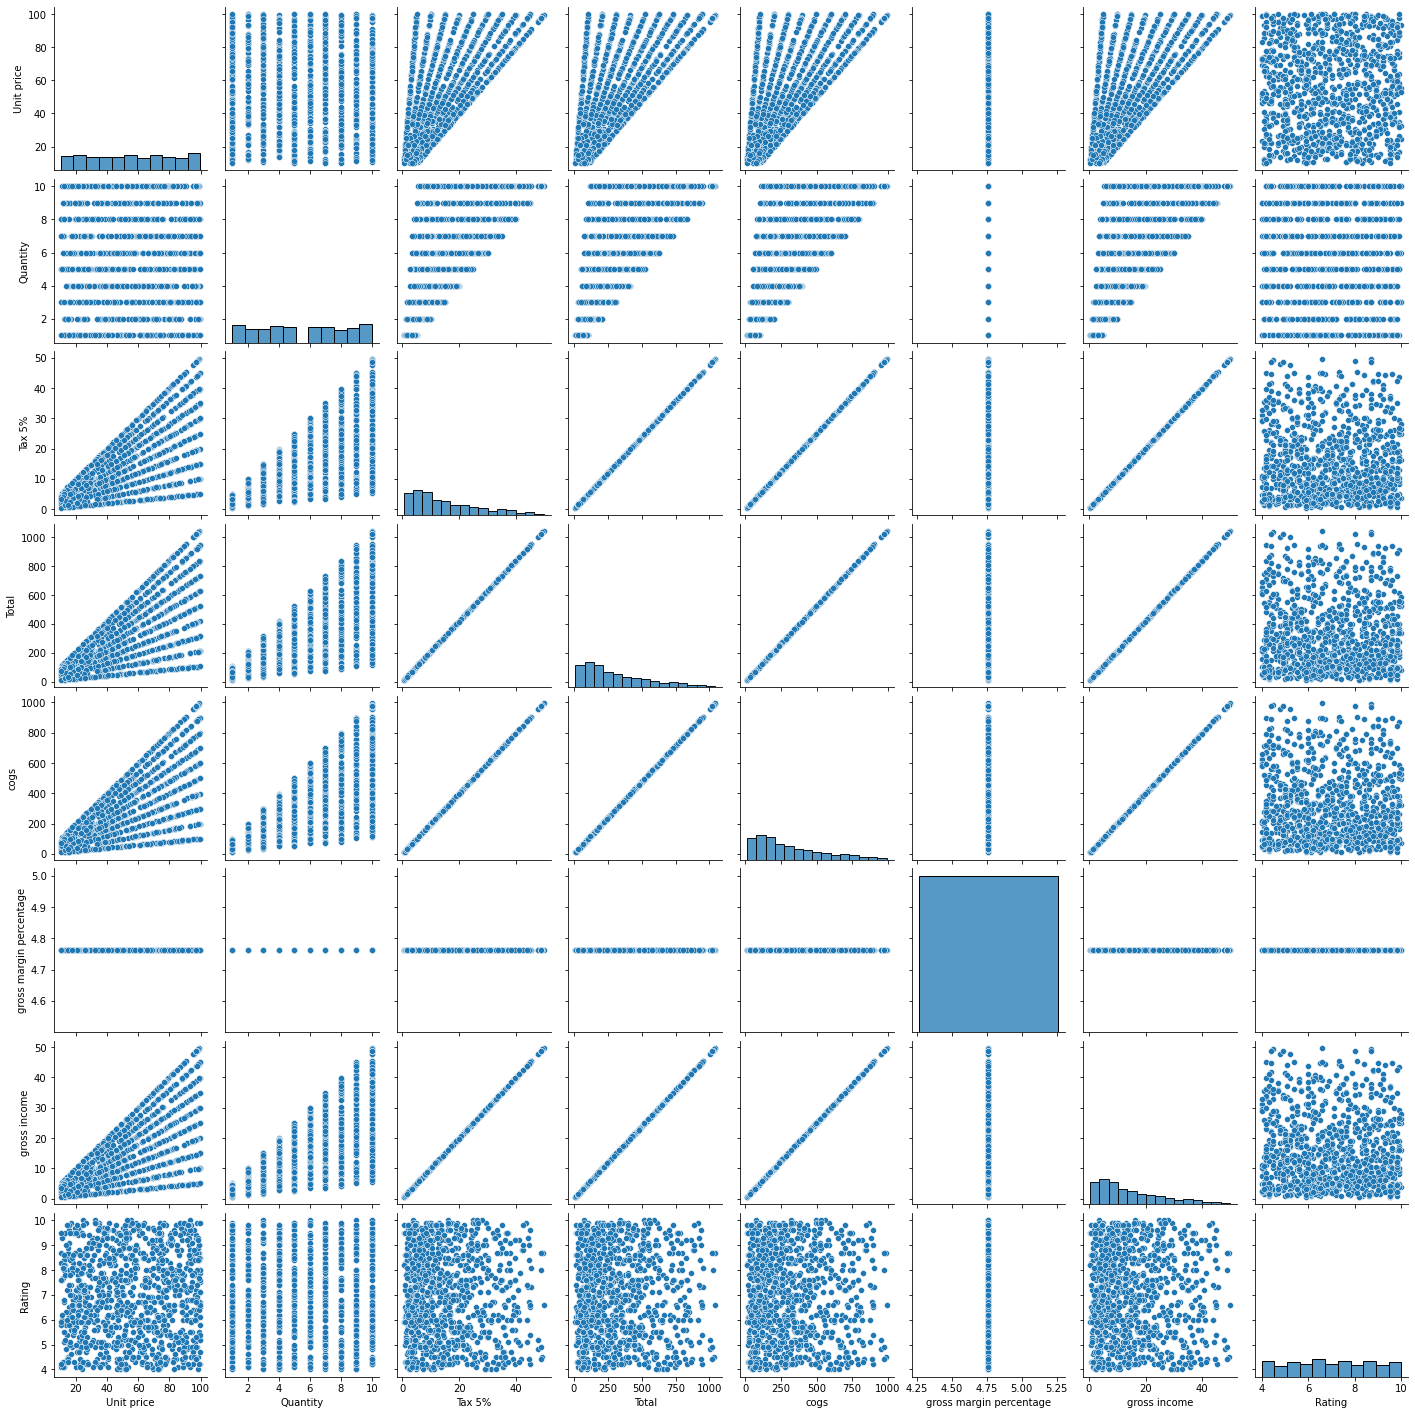

In [107]:
plt.figure(figsize = (20,20))
sns.pairplot(df) # to find all possible pair plots in the dataframe, not recommended, helpful only for small dataset

# Task 4: Dealing with Duplicate rows and Missing values

In [25]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-01-29    False
2019-03-02    False
2019-02-09    False
2019-02-22    False
2019-02-18    False
Length: 1000, dtype: bool

In [26]:
df.duplicated().sum()

0

In [27]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
# to find missing values per column
df.isna().sum()/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

<AxesSubplot:ylabel='Date'>

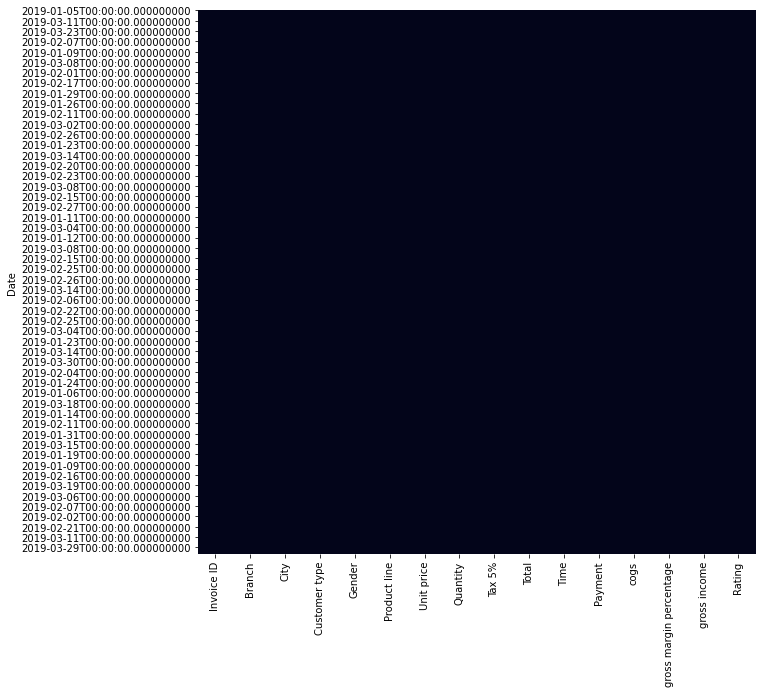

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cbar = False) #to view missing data, answer, theres no missing data here

In [31]:
#in order to fillup missing data with mean or you could fill with zero
df.fillna(df.mean(), inplace = True) #inplace = True means it's a permanent change , fillna with mean only fills up missing data for numerical 


In [32]:
df.mode().iloc[0] #for missing nonnumerical

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                               83.77
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                  14:42:00
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [33]:
df.fillna(df.mode().iloc[0], inplace = True) #fillna with mode to fillup missing data for non-numerical 

In [36]:
dataset = pd.read_excel('archive/supermarket_sales.xlsx')
prof = ProfileReport(dataset) #feasible only for small dataset
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Task 5: Correlation Analysis

In [42]:
#finding out correlation between gross income and rating
np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [43]:
np.corrcoef(df['gross income'], df['Rating'])[1][0]

-0.03644170499701836

In [44]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

In [48]:
df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

In [50]:
round(df.corr(),2) #correlation matrix system rounded by decimal 2 positions

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.71   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot:>

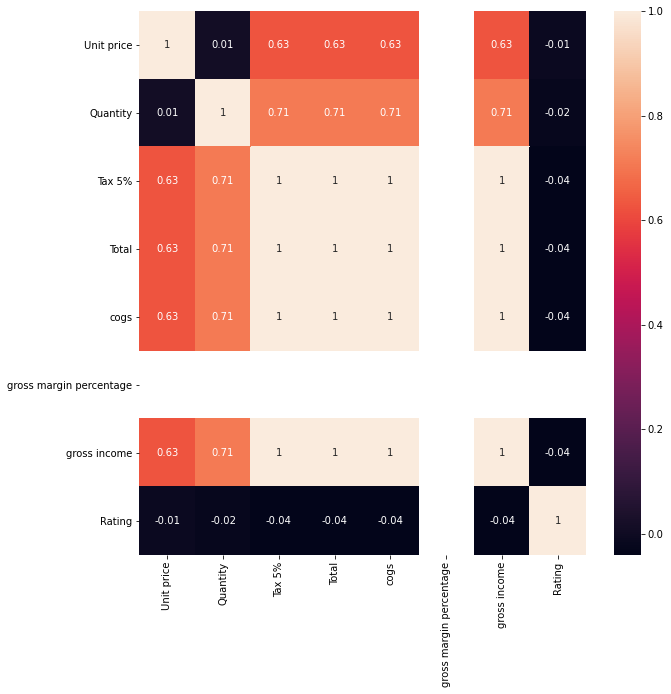

In [106]:
#visually seeing it by sns heatmap
plt.figure(figsize = (10,10))
sns.heatmap(round(df.corr(),2), annot = True) #annotation helps to label the heatmap with correlation value
#the heatmap shows product rating has no significant relation with other attributes in the dataset

# Completed